In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


In [2]:
df = pd.read_csv('ifood_df.csv')  # Replace with actual path
df.head()


,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [3]:
df.info()
df.isnull().sum()

# Handling missing values (example)
df.fillna(df.mean(), inplace=True)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

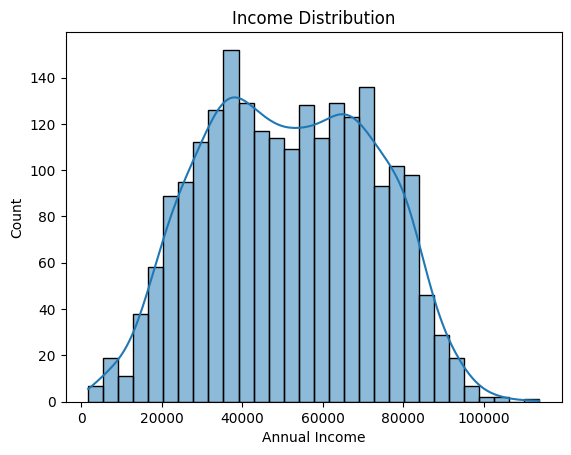

In [6]:


sns.histplot(df['Income'], bins=30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Annual Income')
plt.ylabel('Count')
plt.show()


In [11]:
print(df.columns)


Index(['Annual Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines',
       'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')


In [12]:
# Rename 'Income' to 'Annual Income'
df.rename(columns={'Income': 'Annual Income'}, inplace=True)

# If you want to create 'MntTotal' manually (in case not already in your CSV)
if 'MntTotal' not in df.columns:
    df['MntTotal'] = df[['MntWines', 'MntFruits', 'MntMeatProducts',
                         'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']].sum(axis=1)

# Filter by Annual Income range
filtered_df = df[(df['Annual Income'] >= 30000) & (df['Annual Income'] <= 70000)]

# Average total spending in that income range
print(filtered_df['MntTotal'].mean())


463.40494011976045


In [14]:
# Use 'Age', 'Annual Income', and 'MntTotal' as features
features = df[['Age', 'Annual Income', 'MntTotal']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


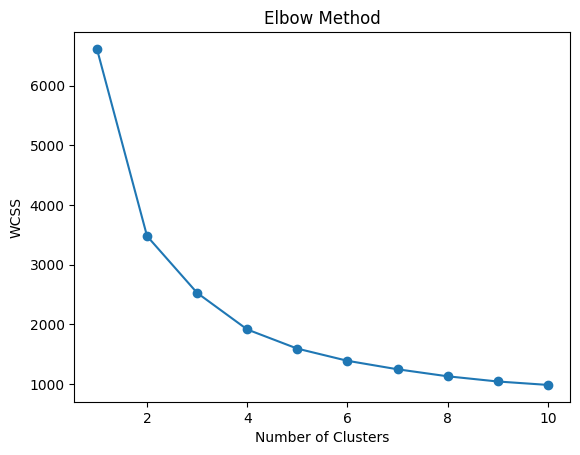

In [15]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(scaled_features)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


In [16]:
kmeans = KMeans(n_clusters=4, random_state=42)
df['Cluster'] = kmeans.fit_predict(scaled_features)


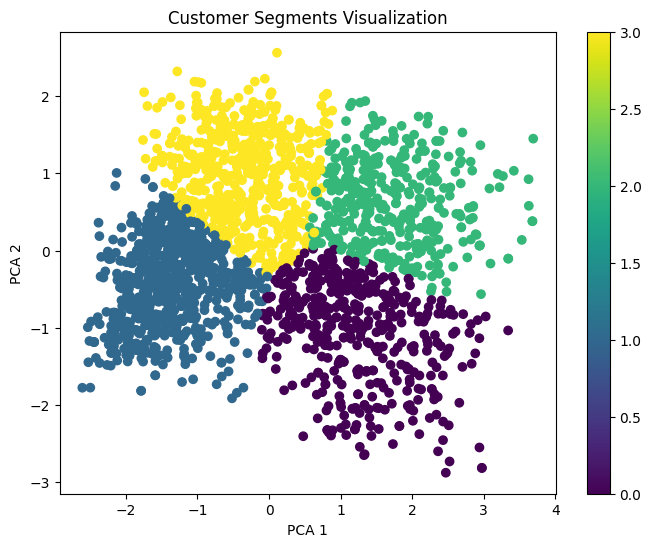

In [17]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(scaled_features)

plt.figure(figsize=(8,6))
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=df['Cluster'], cmap='viridis')
plt.title('Customer Segments Visualization')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar()
plt.show()


In [18]:
cluster_summary = df.groupby('Cluster').mean()
print(cluster_summary)


         Annual Income   Kidhome  Teenhome    Recency    MntWines  MntFruits  \
Cluster                                                                        
0         72082.015086  0.144397  0.403017  49.616379  608.681034  58.181034   
1         32922.661558  0.823755  0.310345  48.005109   55.676884   6.742018   
2         72844.201531  0.033163  0.464286  49.732143  654.326531  51.941327   
3         46019.952297  0.441696  0.892226  49.399293  163.558304   9.863958   

         MntMeatProducts  MntFishProducts  MntSweetProducts  MntGoldProds  \
Cluster                                                                     
0             364.838362        79.788793         59.987069     73.758621   
1              33.598978        10.139208          6.800766     21.524904   
2             355.158163        76.803571         53.471939     75.739796   
3              52.469965        14.461131         10.067138     28.936396   

         ...  marital_Together  marital_Widow  education

**Conclusion & Business Recommendations**

Segment 0: Young high-spenders – target for luxury offers.

Segment 1: Older low-spenders – offer discounts to boost activity.

Segment 2: Middle-aged steady spenders – promote loyalty programs.

Segment 3: Low income, low spend – minimal marketing.